## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [12]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 20% of the data in the test set
4. Normalize the data with QuantileTransformer. Many of the features are highly skewed.

In [13]:
# answer below:
reviews = reviews.drop(['App', 'Category', 'Size', 'Installs', 'Genres','Last Updated', 'Current Ver', 'Android Ver'], axis = 1)
reviews

,Rating,Reviews,Type,Price,Content Rating
0,4.1,159,Free,0,Everyone
1,3.9,967,Free,0,Everyone
2,4.7,87510,Free,0,Everyone
3,4.5,215644,Free,0,Teen
4,4.3,967,Free,0,Everyone
...,...,...,...,...,...
10836,4.5,38,Free,0,Everyone
10837,5.0,4,Free,0,Everyone
10838,NaN,3,Free,0,Everyone
10839,4.5,114,Free,0,Mature 17+


In [14]:
# answer below:
reviews = reviews.dropna()
reviews

,Rating,Reviews,Type,Price,Content Rating
0,4.1,159,Free,0,Everyone
1,3.9,967,Free,0,Everyone
2,4.7,87510,Free,0,Everyone
3,4.5,215644,Free,0,Teen
4,4.3,967,Free,0,Everyone
...,...,...,...,...,...
10834,4.0,7,Free,0,Everyone
10836,4.5,38,Free,0,Everyone
10837,5.0,4,Free,0,Everyone
10839,4.5,114,Free,0,Mature 17+


In [15]:
# answer below:
print(reviews['Content Rating'].value_counts())
print(reviews['Type'].value_counts())

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64
Free    8719
Paid     647
Name: Type, dtype: int64


In [16]:
reviews = reviews.loc[(reviews['Content Rating'] != 'Adults only 18+') & (reviews['Content Rating'] != 'Unrated')]
reviews['Content Rating'].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [17]:
# answer below:
from sklearn.preprocessing import OrdinalEncoder
reviews['Type'] = pd.get_dummies(reviews['Type'],drop_first=True)
content = pd.get_dummies(reviews['Content Rating'], drop_first=True)
reviews = reviews.drop(['Content Rating'], axis = 1)
cleaned = pd.concat([reviews, content], axis=1)
cleaned


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rating,Reviews,Type,Price,Everyone 10+,Mature 17+,Teen
0,4.1,159,0,0,0,0,0
1,3.9,967,0,0,0,0,0
2,4.7,87510,0,0,0,0,0
3,4.5,215644,0,0,0,0,1
4,4.3,967,0,0,0,0,0
...,...,...,...,...,...,...,...
10834,4.0,7,0,0,0,0,0
10836,4.5,38,0,0,0,0,0
10837,5.0,4,0,0,0,0,0
10839,4.5,114,0,0,0,1,0


In [18]:
# answer below:
cleaned['Reviews'] = cleaned['Reviews'].map(lambda x: float(x))

cleaned['Price'] = cleaned['Price'].map(lambda x: float(x[1::]) if x[0] == '$' else float(x))
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        9362 non-null   float64
 1   Reviews       9362 non-null   float64
 2   Type          9362 non-null   uint8  
 3   Price         9362 non-null   float64
 4   Everyone 10+  9362 non-null   uint8  
 5   Mature 17+    9362 non-null   uint8  
 6   Teen          9362 non-null   uint8  
dtypes: float64(3), uint8(4)
memory usage: 329.1 KB


In [19]:
# answer below:
from sklearn.model_selection import train_test_split
y = cleaned['Rating']
X = cleaned.drop('Rating', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
#Normalize the data with QuantileTransformer. Many of the features are highly skewed.
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
qt1 = qt.fit_transform(X_train)
#qt.transform(X_test)

Create a linear regression model using statsmodels. Look at the coefficient values and their associated p values. Additionally, check model assumptions of homoscedacity, normality of errors, and multicollinearity.

In [30]:
# answer below:
import statsmodels.api as sm
X_const = sm.add_constant(qt1)
fit = sm.OLS(y_train, X_const).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     70.55
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           7.90e-86
Time:                        18:28:42   Log-Likelihood:                -5306.1
No. Observations:                7489   AIC:                         1.063e+04
Df Residuals:                    7482   BIC:                         1.067e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9882      0.012    333.406      0.0

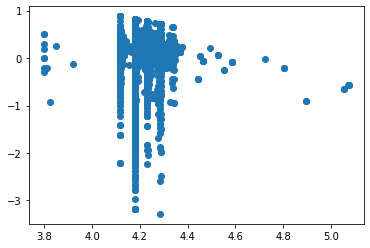

bartlett statistics: BartlettResult(statistic=23108.83860819897, pvalue=0.0)
levene statistics: LeveneResult(statistic=5019.442095589831, pvalue=0.0)


In [31]:
#Heteroscedascity.
from sklearn.linear_model import LinearRegression
from scipy import stats

linear = LinearRegression()
linear.fit(X_train, y_train)

pred = linear.predict(X_train)
residual = y_train - pred

plt.scatter(pred, residual)
plt.show()

print('bartlett statistics: {}'.format(stats.bartlett(residual, pred)))
print('levene statistics: {}'.format(stats.levene(residual, pred)))


In [33]:
#multicollinearity
X_train.corr()

,Reviews,Type,Price,Everyone 10+,Mature 17+,Teen
Reviews,1.000000,-0.045638,-0.010308,0.077208,-0.007300,0.049605
Type,-0.045638,1.000000,0.221780,0.018428,-0.027796,-0.036622
Price,-0.010308,0.221780,1.000000,-0.006702,-0.009876,-0.006575
Everyone 10+,0.077208,0.018428,-0.006702,1.000000,-0.048439,-0.076247
Mature 17+,-0.007300,-0.027796,-0.009876,-0.048439,1.000000,-0.082742
Teen,0.049605,-0.036622,-0.006575,-0.076247,-0.082742,1.000000


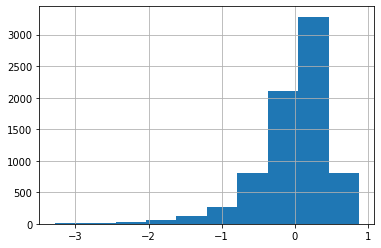

In [37]:
residual.hist()
plt.show()

Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

In [40]:
X = cleaned.drop(columns=['Teen', 'Everyone 10+', 'Rating'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
X

,Reviews,Type,Price,Mature 17+
0,159.0,0,0.0,0
1,967.0,0,0.0,0
2,87510.0,0,0.0,0
3,215644.0,0,0.0,0
4,967.0,0,0.0,0
...,...,...,...,...
10834,7.0,0,0.0,0
10836,38.0,0,0.0,0
10837,4.0,0,0.0,0
10839,114.0,0,0.0,1


In [42]:
#Normalize the data with QuantileTransformer. Many of the features are highly skewed.
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
qt1 = qt.fit_transform(X_train)
#qt.transform(X_test)

In [43]:
X_const = sm.add_constant(qt1)
fit = sm.OLS(y_train, X_const).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     112.9
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.41e-93
Time:                        18:42:30   Log-Likelihood:                -5458.3
No. Observations:                7489   AIC:                         1.093e+04
Df Residuals:                    7484   BIC:                         1.096e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9698      0.012    326.364      0.0

Plot the scatterplots between the independent variables you select and ratings. Do you think given these graphs, these variables have good predictive power? 

In [53]:
X

,Reviews,Type,Price,Mature 17+
0,159.0,0,0.0,0
1,967.0,0,0.0,0
2,87510.0,0,0.0,0
3,215644.0,0,0.0,0
4,967.0,0,0.0,0
...,...,...,...,...
10834,7.0,0,0.0,0
10836,38.0,0,0.0,0
10837,4.0,0,0.0,0
10839,114.0,0,0.0,1


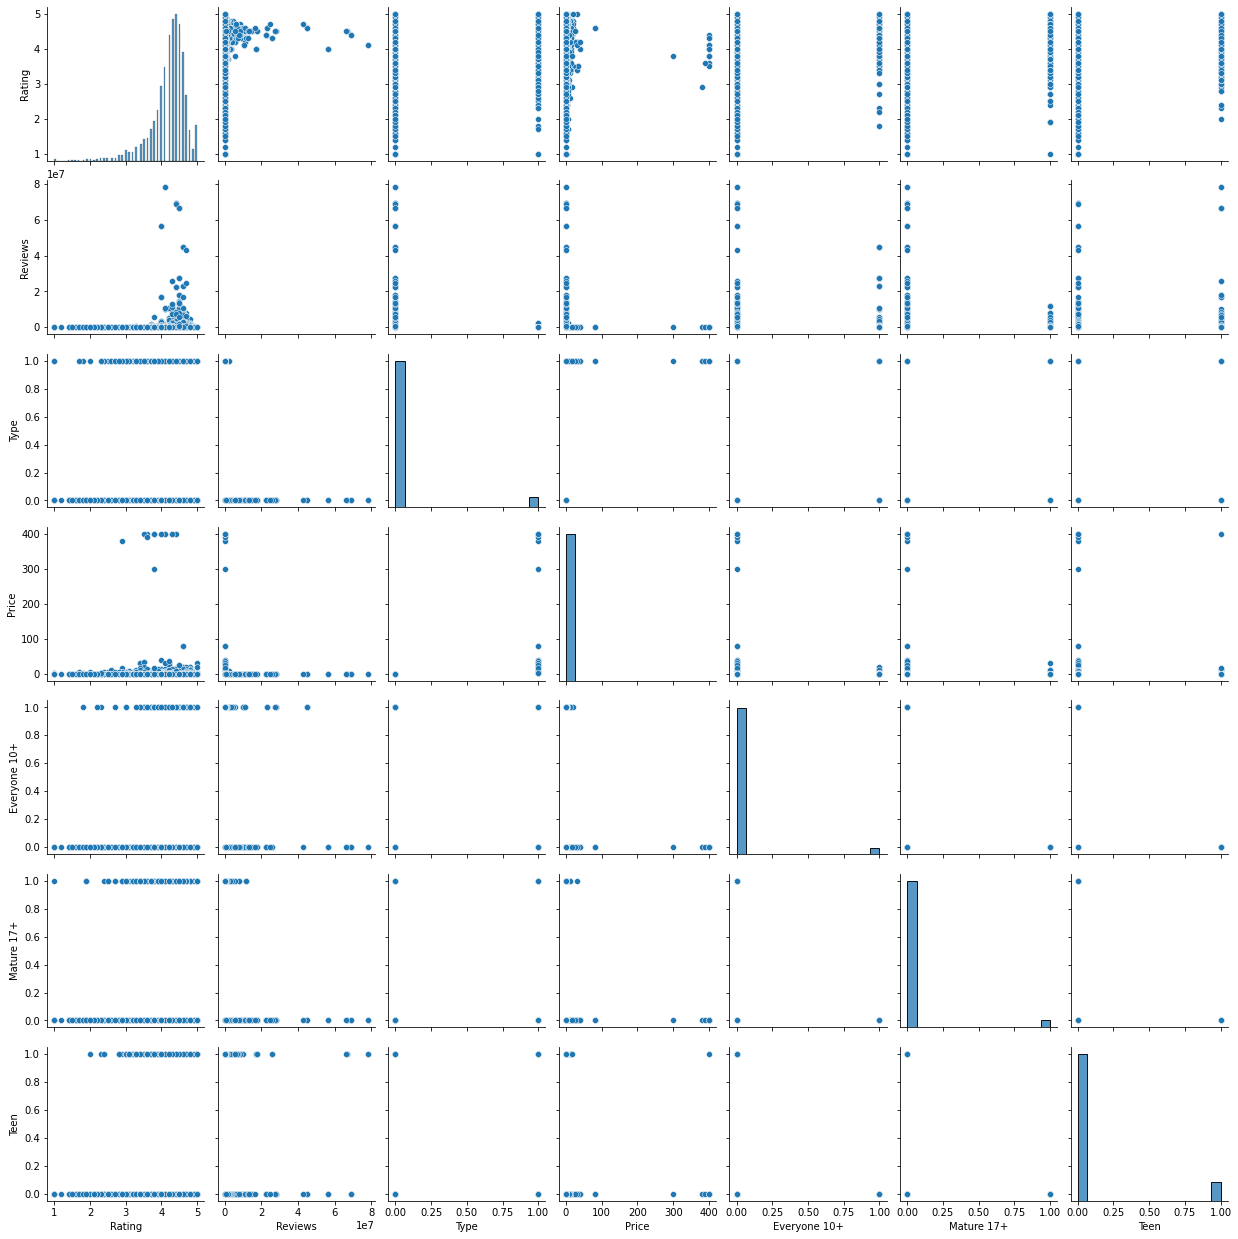

In [55]:
import seaborn as sns
sns.pairplot(cleaned)

What data processing could you do to improve this model? Experiment.

We would analyze on Ratings and Reviews only as the distribution is not binary or categorical in nature. 

In [61]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        9362 non-null   float64
 1   Reviews       9362 non-null   float64
 2   Type          9362 non-null   uint8  
 3   Price         9362 non-null   float64
 4   Everyone 10+  9362 non-null   uint8  
 5   Mature 17+    9362 non-null   uint8  
 6   Teen          9362 non-null   uint8  
dtypes: float64(3), uint8(4)
memory usage: 329.1 KB


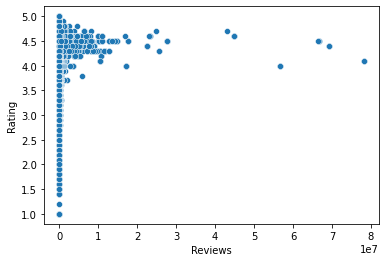

In [65]:
sns.scatterplot(x='Reviews', y='Rating', data=cleaned)